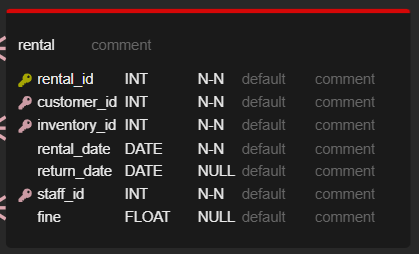

In [94]:
import pandas as pd
import numpy as np
import datetime
#import faker

In [3]:
#czas wypozyczenia to 1 tydzień, 1 dzien opoznienia to 1/10 ceny wypozyczenia
#zakladamy okolo 35 wypozyczen dziennie co daje lacznie okolo 19 tysiecy (powiedzmyze 19241)

In [5]:
inventory_rent = pd.read_csv('inventory_rent.csv')
customer = pd.read_csv('customers.csv')

In [12]:
customer['customer_id'] = customer['customer_id'] + 1 #to jak sie zmieni w customeraxch id od 1 to do usuniecia

In [14]:
customer.head()

,customer_id,first_name,last_name,birthdate,VIP,points,email,phone,address_id,registration_date
0,1,Rafał,Futyma,1985-12-22,0,0,RafaFutym@gmail.com,565462241,0,2022-02-12
1,2,Hubert,Śleziak,1993-05-30,1,1,HuberŚle40@o2.pl,411276177,1,2022-07-05
2,3,Michał,Warchał,1977-11-06,2,2,MichaWa@wp.pl,872630812,2,2021-08-13
3,4,Anita,Magryta,1953-05-31,3,3,AnitMagry@o2.pl,289656001,3,2021-03-01
4,5,Józef,Dorawa,1976-05-24,4,4,JózDor72@live.com,251151747,4,2021-06-08


In [6]:
#na koniec jeszxze uwzglednic czy vip czy nie

In [55]:
n_all_rent = 100 #na poczatek dla spr
n_customers = len(customer)
n_inventory = len(inventory_rent)

In [56]:
np.random.seed(42)

In [57]:
rental_id = np.arange(1, n_all_rent + 1)
customer_id = np.random.choice(np.arange(1, n_customers + 1), size = n_all_rent) #to raczej pozniej jak juz beda inventory
inventory_id = np.random.choice(np.arange(1, n_inventory + 1), size = n_all_rent)

In [226]:
data = {
    'rental_id' : rental_id,
    'customer_id' : customer_id
}

In [227]:
rental = pd.DataFrame(data)
rental.head()

,rental_id,customer_id
0,1,103
1,2,349
2,3,271
3,4,107
4,5,72


In [84]:
#warunki
    # 1. osoba moze wypozyczyc gre adekwatną do swojego wieku
    # 2. nie mozna wypozyczyc gry ktora nie zostala jeszcze oddana
    # 3. return date bedzie pomiedzy rental_date a rental_date + tydzien z pr np 0.7 a rental_date + tdyzien + np 5 dni z pr 0.3
    # 4. mozna generowac rental_date dla kazdego inventory_id osobno zeby uniknac tego co w kom nr 2
    # 5. staff_id - jesli rental_date to niedziela to staff_id to 1, w reszte dat generuj 1,2,3,4,5 z takim samym p-stwem

In [86]:
# wez indeksy (rental_id) wszystkich tych samych inventory_d
#GÓWNO XD
inv_index = {}
for i in rental['inventory_id']:
    inv_index.update #dopisz do slownika inventory id jesli go nie ma (klucz) i jako wartosc rental_id, jesli j
    #uz ten klucz jest to tylko do niego dopisz rental_id

In [206]:
# pierwsze wypozyczenie (losowanie) pierwszego dnia kiedy powstał sklep
def days_from_last_rent():
    possible_days = [0, np.random.randint(1,9), np.random.randint(9,26), np.random.randint(26,61), 
                     np.random.randint(61, 121)]
    prob = [0.1, 0.45, 0.35, 0.09, 0.01]
    return int(np.random.choice(possible_days, p = prob))

In [225]:
# 0 bo moga przyjsc pograc na miejscu i od razu oddac
def rent_days():
    possible_days = [0, np.random.randint(1,8), np.random.randint(8,14), np.random.randint(15,31),
                     np.random.randint(31, 61), np.random.randint(61, 121), np.random.randint(121, 672)]
    prob = [0.35, 0.417, 0.12, 0.05, 0.02, 0.02, 0.015, 0.005, 0.003]
    return int(np.random.choice(possible_days, p = prob))

In [215]:
rent_days()

1

In [216]:
# dla kazdego inventory_id bedziemy losowac historie wypozyczen i zwrotow, pozniej sklejamy wszystkie te historie i posortujemy po dacie
def historia_wypozyczen():
 data_oddania = data_powstania_sklepu
 df = pd.DataFrame('invenotry_id', 'wypozyczenie', 'oddanie')
 for _ in inventory_id:
  x = losuj_ile_dni_minelo_od_oddania_do_wypozyczenia()
  y = losuj_ile_dni_trwalo_wypozyczenie()
  data_wypozyczenia = data_oddania + x
  data_oddania = data_wypozyczenia + y
  new_row = {'invenotry_id': inventory_id, 'wypozyczenie': data_wypozyczenia, 'oddanie': data_oddania}
  df = df.append(new_row, ignore_index=True)


In [97]:
my_date = datetime.date(2021, 1,4) 
print(my_date + datetime.timedelta(days = 18))

2021-01-22


In [224]:
rental_dates = []
return_dates = []

rental_date = datetime.date(2021, 1, 4)
rental_dates.append(rental_date)

for _ in inventory_id:
    return_date = rental_date + datetime.timedelta(days = rent_days())
    return_dates.append(return_date)
    if return_date  '2023-06-15':
    rental_date = return_date + datetime.timedelta(days = days_from_last_rent())
    rental_dates.append(rental_date)
    

ValueError: invalid literal for int() with base 10: 'NULL'

In [223]:
len(rental_dates)
len(return_dates)

100